<a href="https://colab.research.google.com/github/tasmimjoti/Machine-Learning-in-Business/blob/main/Employee_Retention_in_the_US_IT_sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report, confusion_matrix

**Loading the dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics for Improving Employee Retention in the U.S. Technology Sector/survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [ ]:
print(df.columns)

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

**Data Preprocessing**

In [ ]:
columns = ['Country', 'RemoteWork', 'ConvertedCompYearly', 'Employment', 'WorkExp']
df_us = df[df['Country'] == 'United States of America'][columns]
# Drop rows with missing values
df_us = df_us.dropna()

# Encode target variable: Let's assume we treat 'Employment' as an indicator for job seeking behavior
df_us['JobSeek'] = df_us['Employment'].apply(lambda x: 1 if x != 'Employed full-time' else 0)

In [ ]:
df_us.head()

,Country,RemoteWork,ConvertedCompYearly,Employment,WorkExp,JobSeek
1,United States of America,Remote,285000.0,"Employed, full-time",10.0,1
2,United States of America,"Hybrid (some remote, some in-person)",250000.0,"Employed, full-time",23.0,1
3,United States of America,"Hybrid (some remote, some in-person)",156000.0,"Employed, full-time",7.0,1
6,United States of America,Remote,135000.0,"Employed, full-time",4.0,1
7,United States of America,Remote,80000.0,"Employed, full-time",5.0,1


In [ ]:
print(df_us.shape)

(8007, 6)


In [ ]:
# Encode target variable: Let's assume we treat 'Employment' as an indicator for job seeking behavior
df_us['JobSeek'] = df_us['Employment'].apply(lambda x: 1 if x != 'Employed, full-time' else 0)

# Step 3: Feature Engineering (Convert categorical columns to numerical)
X = df_us.drop(columns=['JobSeek', 'Employment'])
y = df_us['JobSeek']
X = pd.get_dummies(X, drop_first=True)

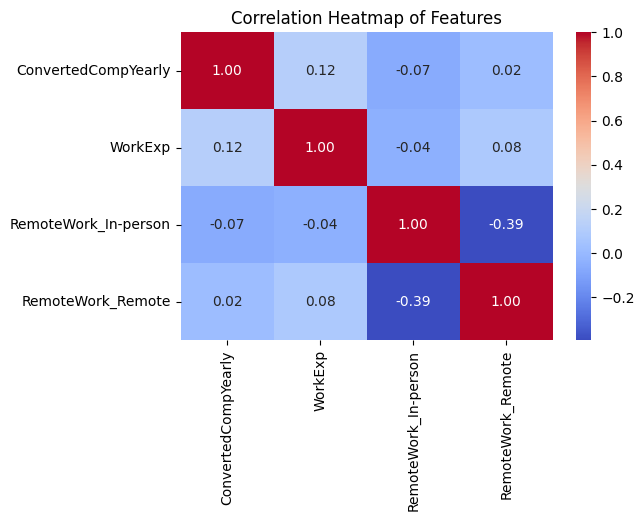

In [ ]:
# Correlation Heatmap (Visualizing Feature Correlations)
plt.figure(figsize=(6, 4))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

**Split Data into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

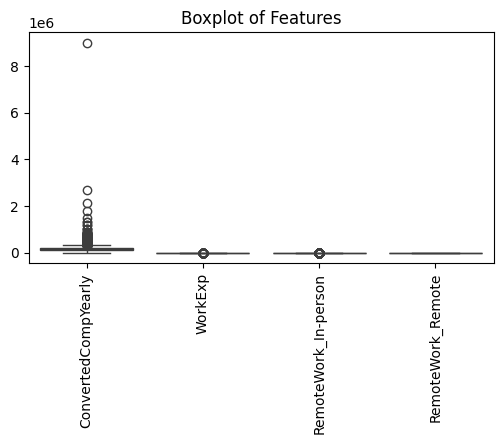

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(data=X_train)
plt.title("Boxplot of Features")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Checking if the target data is balanced
print(df_us['JobSeek'].value_counts())

JobSeek
0    7311
1     696
Name: count, dtype: int64


**Oversampling to balance the target class distribution**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

**Initialize Models**

In [ ]:
svc_model = SVC(probability=True, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
xgboost_model = XGBClassifier(random_state=42)

**Training the models**

In [ ]:
svc_model.fit(X_res, y_res)

SVC(probability=True, random_state=42)

In [ ]:
random_forest_model.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [ ]:
xgboost_model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Support Vector Machines (SVM) Evaluation**

In [ ]:
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print(f"SVC Accuracy: {svc_accuracy * 100:.2f}%")
print("SVC Report:")
print(classification_report(y_test, svc_pred))

SVC Accuracy: 65.04%
SVC Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1457
           1       0.10      0.38      0.16       145

    accuracy                           0.65      1602
   macro avg       0.51      0.53      0.47      1602
weighted avg       0.84      0.65      0.72      1602



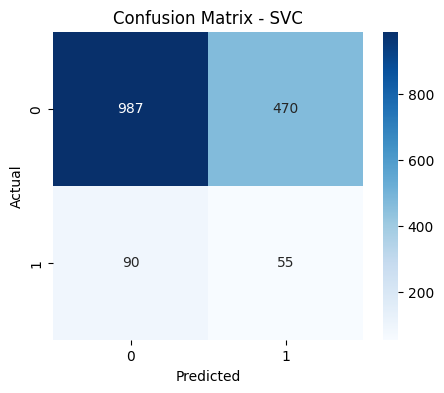

In [ ]:
cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(5, 4))  # Adjust the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)  # Enable the color bar (cbar=True)
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Random Forest Evaluation**

In [ ]:
random_forest_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print(f"Random Forest Accuracy: {random_forest_accuracy * 100:.2f}%")
print("Random Forest Report:")
print(classification_report(y_test, random_forest_pred))

Random Forest Accuracy: 82.71%
Random Forest Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1457
           1       0.13      0.17      0.15       145

    accuracy                           0.83      1602
   macro avg       0.52      0.53      0.53      1602
weighted avg       0.84      0.83      0.84      1602



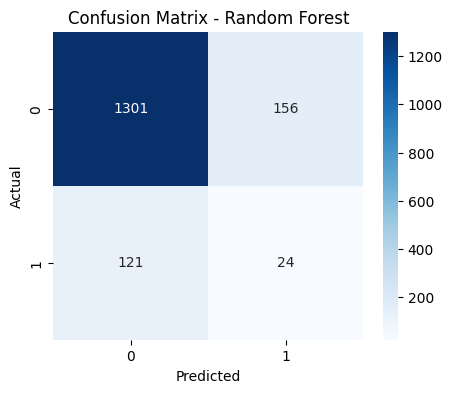

In [ ]:
cm = confusion_matrix(y_test, random_forest_pred)
plt.figure(figsize=(5, 4))  # Adjust the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)  # Enable the color bar (cbar=True)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**XGBoost Classifier Evaluation**

In [ ]:
xgboost_pred = xgboost_model.predict(X_test)
xgboost_accuracy = accuracy_score(y_test, xgboost_pred)
print(f"XGBoost Accuracy: {xgboost_accuracy * 100:.2f}%")
print("XGBoost Report:")
print(classification_report(y_test, xgboost_pred))

XGBoost Accuracy: 84.46%
XGBoost Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1457
           1       0.17      0.19      0.18       145

    accuracy                           0.84      1602
   macro avg       0.55      0.55      0.55      1602
weighted avg       0.85      0.84      0.85      1602



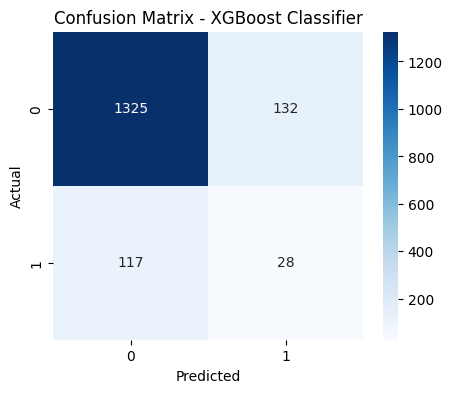

In [ ]:
cm = confusion_matrix(y_test, xgboost_pred)
plt.figure(figsize=(5, 4))  # Adjust the figure size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)  # Enable the color bar (cbar=True)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**PCA**

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply PCA, for example reducing to 10 principal components
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check how much variance is explained by each principal component
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.35848119 0.26910916 0.22419259 0.14821705]


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_pca, y_train)

# Predict on the test data
y_pred_pca = xgb_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA-reduced data: {accuracy}")

Accuracy with PCA-reduced data: 0.8951310861423221


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:10:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[1432   25]
 [ 143    2]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1457
           1       0.07      0.01      0.02       145

    accuracy                           0.90      1602
   macro avg       0.49      0.50      0.48      1602
weighted avg       0.83      0.90      0.86      1602



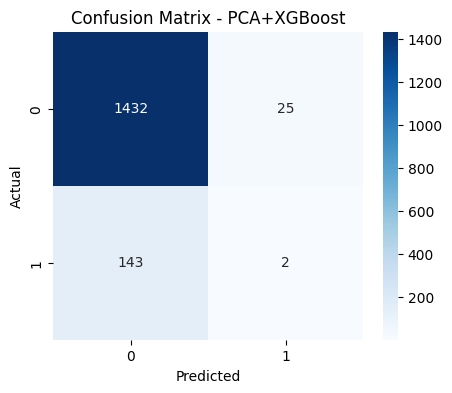

In [ ]:
cm_pca = confusion_matrix(y_test, y_pred_pca)
print(f"Confusion Matrix:\n {cm_pca}")

# Classification report
print(classification_report(y_test, y_pred_pca))
plt.figure(figsize=(5, 4))  # Adjust the figure size
sns.heatmap(cm_pca, annot=True, fmt="d", cmap="Blues", cbar=True)  # Enable the color bar (cbar=True)
plt.title("Confusion Matrix - PCA+XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

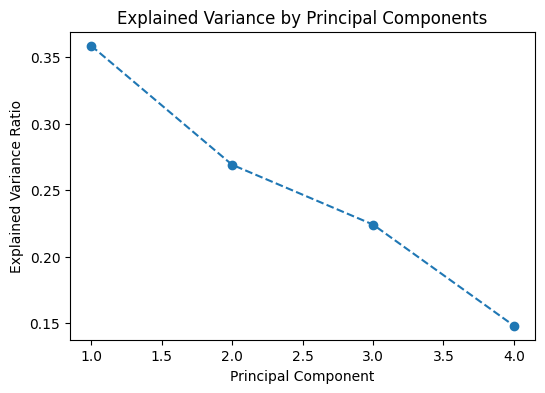

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

**ROC curve**

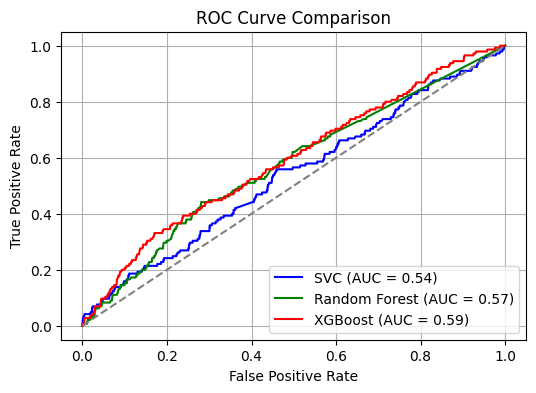

In [ ]:
svc_probs = svc_model.predict_proba(X_test)[:, 1]
rf_probs = random_forest_model.predict_proba(X_test)[:, 1]
xgb_probs = xgboost_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC scores
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

svc_auc = roc_auc_score(y_test, svc_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Plot ROC curves
plt.figure(figsize=(6, 4))
plt.plot(svc_fpr, svc_tpr, label=f'SVC (AUC = {svc_auc:.2f})', color='blue')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})', color='red')

# Plot the no-skill line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()